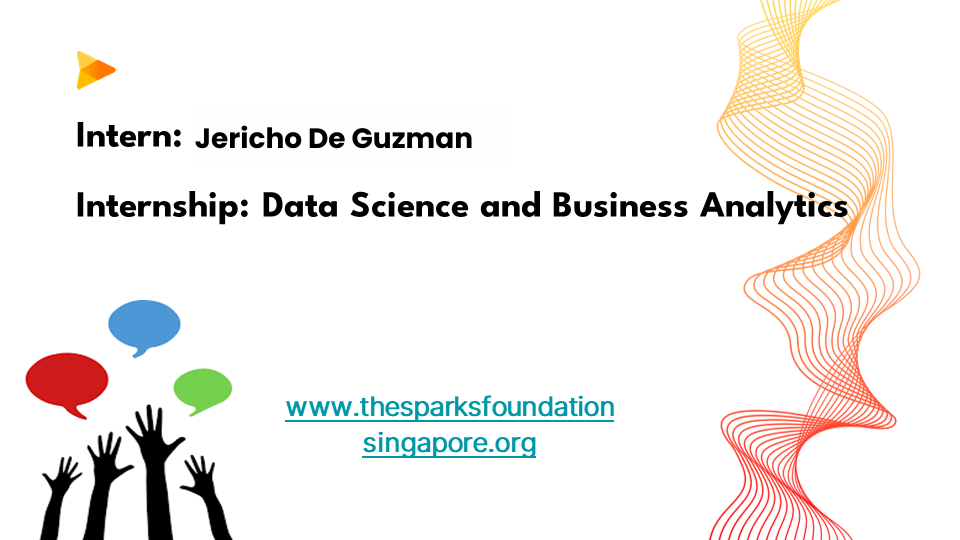

In [2]:
from IPython.display import Image

Image('TSF1.png')

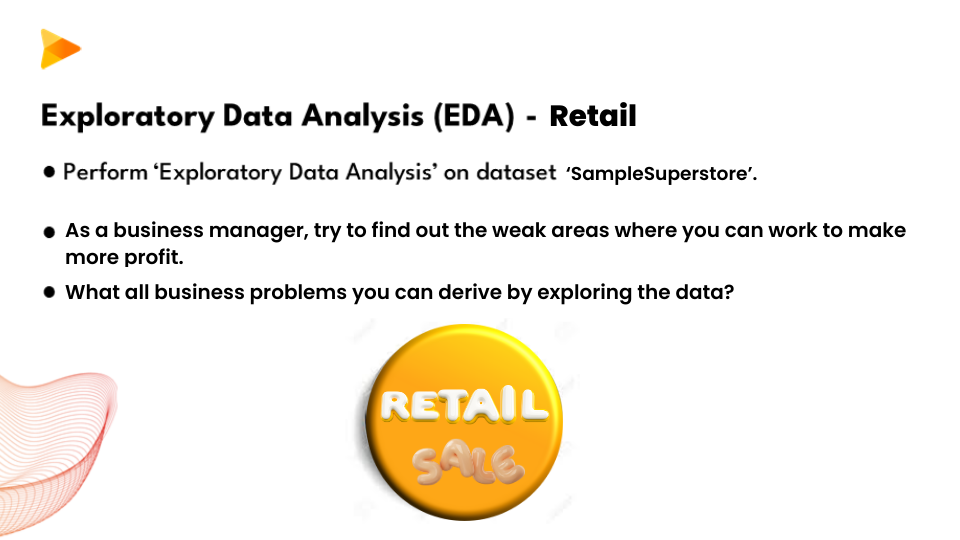

In [3]:
Image('TSF2.png')

# What is EDA ?

EDA stands for Exploratory Data Analysis. It is the process of analyzing and understanding data sets to summarize their main characteristics and gain insights into the underlying patterns, relationships, and trends. EDA typically involves methods such as data visualization, summary statistics, and hypothesis testing, and is often used as a precursor to more advanced analysis techniques. The goal of EDA is to gain a deeper understanding of the data and uncover any interesting or important information that may be hidden within it.

# Importing the Libraries 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
from scipy import stats
import squarify

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20000)

# Importing the Retail Dataset

In [5]:
retail_dataset = pd.read_csv('superstore.csv')

# Data Preprocessing

In [6]:
retail_dataset.shape

(9994, 13)

In [7]:
retail_dataset.size

129922

In [8]:
retail_dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
retail_dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
retail_dataset['Postal Code'] = retail_dataset['Postal Code'].astype('str')

# Performing EDA

In [12]:
retail_dataset.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# Location of the lowest sales in the data

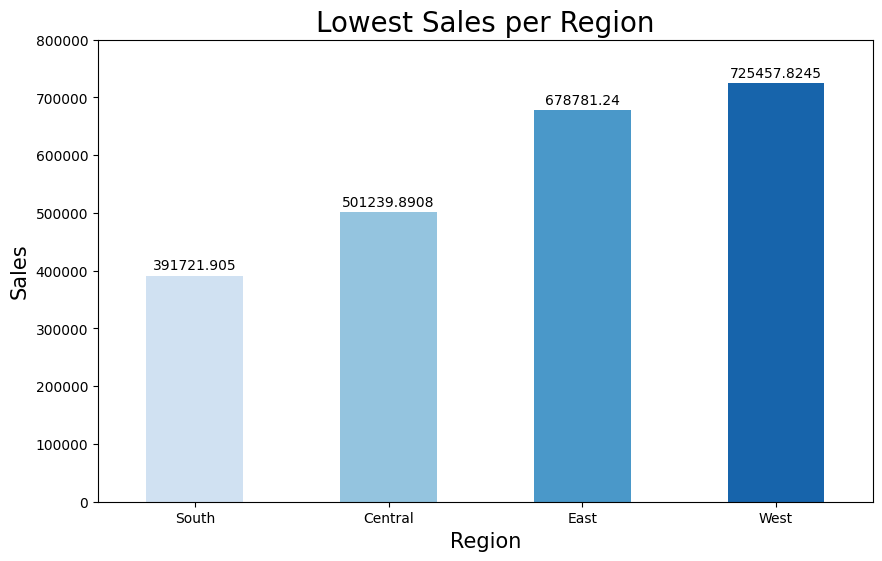

In [13]:
region = retail_dataset.groupby('Region')['Sales'].sum().sort_values(ascending=True)

cmap = sns.color_palette('Blues', len(region))

ax = region.plot(kind='bar', figsize=(10, 6), color=cmap)

plt.title('Lowest Sales per Region', fontsize=20)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(rotation=360)
ax.set_ylim(0, 800000)

# Annotation
for i, v in enumerate(region):
    ax.text(i, v + 10000, str(v), color='black', fontsize=10, ha='center')

plt.show()


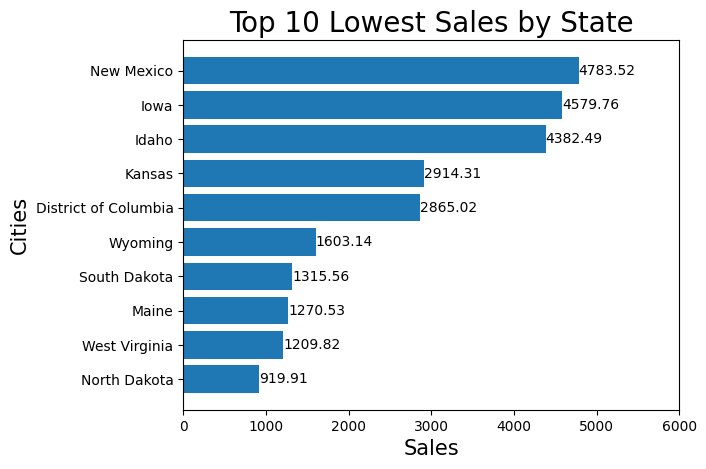

In [14]:
state = retail_dataset.groupby('State')['Sales'].sum().reset_index(name='Sales').sort_values(by='Sales',ascending=True).head(10)

fig, ax = plt.subplots()
bars = ax.barh(state['State'], state['Sales'])

plt.title('Top 10 Lowest Sales by State', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Cities', fontsize=15)
ax.set_xlim(0, 6000)

for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width:.2f}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                ha='left',
                va='center')

plt.show()

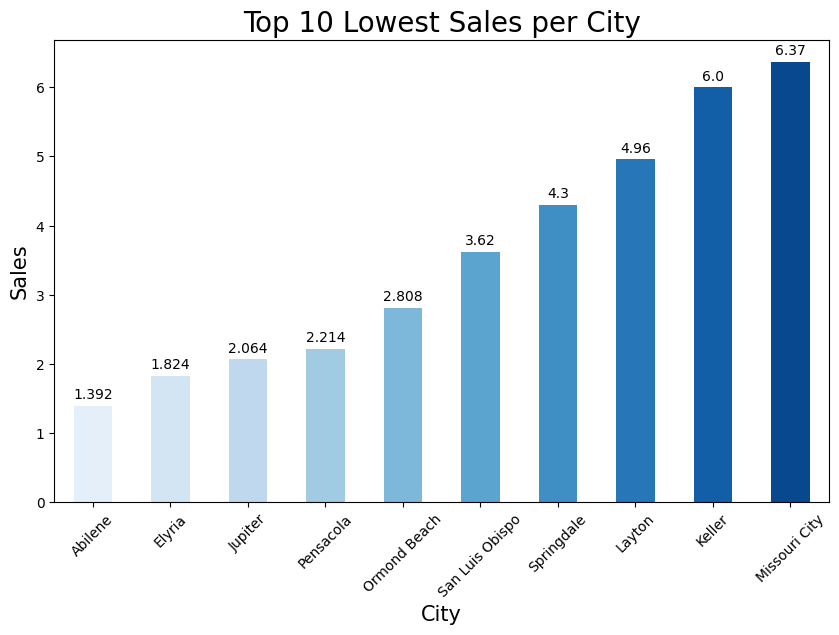

In [15]:
city = retail_dataset.groupby('City')['Sales'].sum().sort_values(ascending=True).head(10)

cmap = sns.color_palette('Blues', len(city))

ax = city.plot(kind='bar', figsize=(10, 6), color=cmap)

plt.title('Top 10 Lowest Sales per City', fontsize=20)
plt.xlabel('City', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(rotation=45)

# Annotation
for i, v in enumerate(city):
    ax.text(i, v + .1, str(v), color='black', fontsize=10, ha='center')

plt.show()


# Most Customer Segments

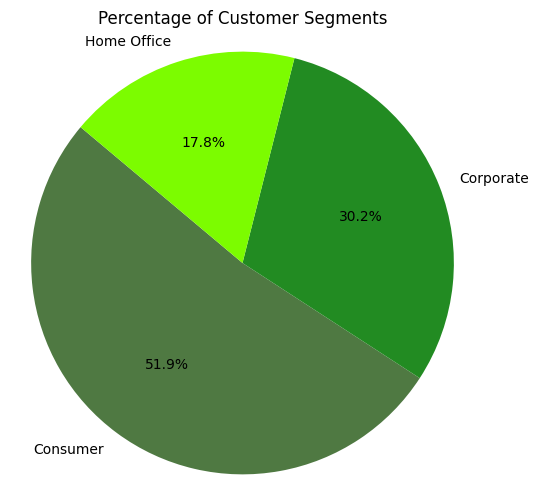

In [16]:
# Sample data
segments = retail_dataset.groupby('Segment').size()

plt.figure(figsize=(6, 6))
colors = ['#4F7942', '#228B22', '#7CFC00']
plt.pie(segments.values[:], labels=segments.index[:], autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title('Percentage of Customer Segments')
plt.show()

# Best Selling Category and Sub-Category

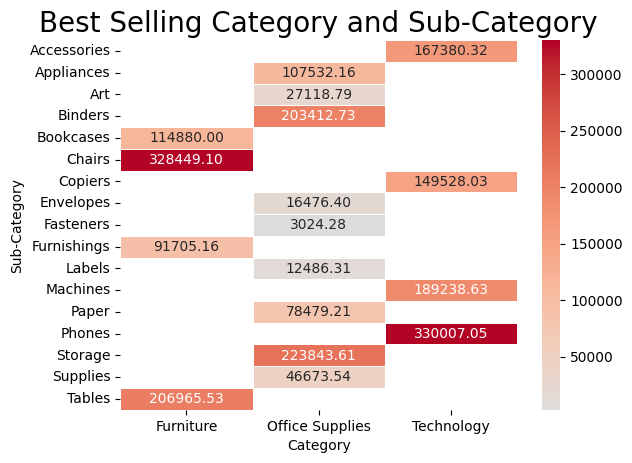

In [17]:
category = retail_dataset.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index(name='Sales').sort_values(by='Sales', ascending=False)
category_pivot = category.pivot(index='Sub-Category', columns='Category', values='Sales')

sns.heatmap(category_pivot,
            cmap="coolwarm",  # Choose a colormap
            annot=True,  # Annotate with values
            linewidths=.5,  # Add lines between cells
            fmt=".2f",  # Format annotations
            center=0)  # Center the colormap

plt.title('Best Selling Category and Sub-Category', fontsize=20)
plt.show()

# Most used Shipping Mode

In [18]:
shipping_mode = retail_dataset.groupby('Ship Mode').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

fig = px.funnel(shipping_mode, x='counts', y='Ship Mode', title='Sales Funnel')
fig.show()

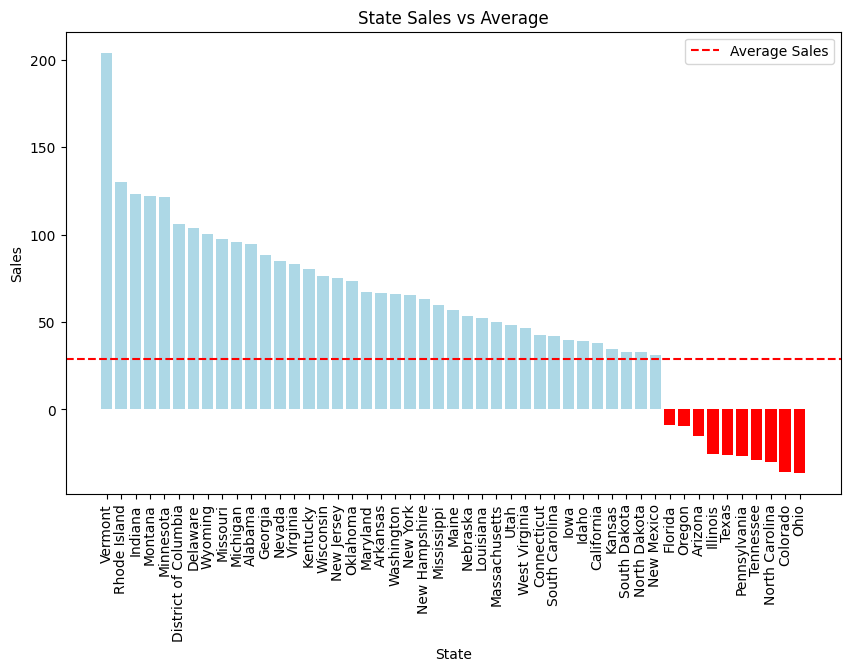

In [19]:
profit = retail_dataset.groupby('State')['Profit'].mean().reset_index(name='profit').sort_values(by='profit', ascending=False)

# Calculate average sales
mean = retail_dataset['Profit'].mean()

# Filter cities below average
below_avg_profit = profit[profit['profit'] < mean]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(profit['State'], profit['profit'], color='lightblue')
plt.axhline(mean, color='red', linestyle='--', label='Average Sales')
plt.bar(below_avg_profit['State'], below_avg_profit['profit'], color='red')
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('State Sales vs Average')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Insights from the Superstore Dataset

<p>1. The lowest sales in the USA Region is the <strong>South</strong> Region while lowest state is <strong>North Dakota</strong> which is in the Central Region. Lastly the lowest sales in City is <strong>Abilene</strong>.</p>

<p>2. The most customer segments is the <strong>Consumer</strong> with <strong>51.9</strong> percent, next is the <strong>Corporate</strong> with 30.2 percent. Lastly, the <strong>Home Office</strong> got <strong>17.8</strong> percent which is the lowest perentage.</p>

<p>3. The most selling Category is in the <strong>Technology</strong> which is the <strong>phones</strong> and in the <strong>furniture</strong> category is the chair. These two has a little sales value difference.</p>

<p>4. The shipping mode that usually used is the <strong>Standard class</strong> of shipping.</p>

<p>5. There are 10 states that did not meet the average profit. This states are <strong>Florida</strong>, <strong>Oregon</strong>, <strong>Arizona</strong>, <strong>Illinois</strong>, <strong>Texas</strong>, <strong>Pennsylvania</strong>, <strong>Tennessee</strong>, <strong>North Carolina</strong>, <strong>Colorado</strong> and <strong>Ohio</strong>.

# Recommendations

<p>1. The retail store in the USA should focus on the state with lowest sales as well as the states and the city. The retail store can do some loyalty programs, Customer profiling and Personalized service to increase sales.</p>

<p>2. In customer segments, continue to maintain the quality service in the Consumers, while they need to improve the quality of service in a Corporate customers. Lastly they need to focus on how to make the quality service as well as making the sales higher with the Home Office customers.

<p>3. Continue to stock the most selling product which is the phones and chairs. Additionally collaborate with complimentary business for mutual benefits as well as improving the inventory management to make sure that the items have stocks.</p>

<p>4. In shipping mode the one with the most used is the Standard shipping. Focus more on the other shipping modes and plan a strategy on how to increase the usage of different shipping mode. Some strategies maybe increase the discount if they try different shipping methods. 

<p>5. The retail store must focus on improving the profits of this 10 states. They can do that by Effective Marketing strategies like digital marketing, online advertising, promotions and discounts. Additionally try to improve by reviewing the customers feedback and reviews about the quality of shopping and used it to plan to increase the sales.<p>